# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '/Users/chloe/Google Drive/Kaggle_Data/kaggle_home_credit_default_risk/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
object_col = []
int_col = []
float_col = []

for col in app_train.columns:
    if app_train[col].dtypes == "int64":
        int_col.append(col)
    elif app_train[col].dtypes == "float64":
        float_col.append(col)
    else:
        object_col.append(col)

In [5]:
# DAYS_EMPLOYED -> two extremes -> > 300K or <0
app_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [6]:
print(f' > 300K: {app_train[app_train["DAYS_EMPLOYED"]>300000].shape[0]}')
print(f' < 0: {app_train[app_train["DAYS_EMPLOYED"]<0].shape[0]}')
print(f'total: {app_train.shape[0]}')

 > 300K: 55374
 < 0: 252135
total: 307511


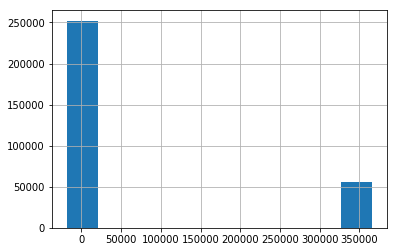

In [7]:
app_train["DAYS_EMPLOYED"].hist()
#app_train.boxplot(column='DAYS_EMPLOYED')

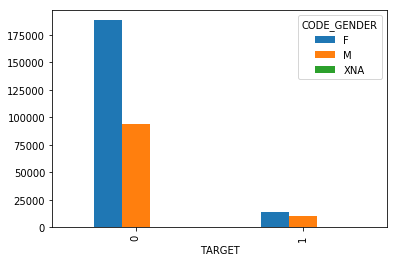

In [14]:
app_train.groupby('CODE_GENDER').TARGET.value_counts().unstack(0).plot.bar()